**Project UAS Data Mining**

disusun oleh :
- Fathia Amira Nuramalia (1806193691)
- Ni Gusti Ayu Nyoman Anggraini Larasati (1806193350)
- Josephine Tasya Andina Gunadi (1806232074)
- Ridho Naryama Utomo (1706047183)

SOCIAL MEDIA ANALYSIS

Topik : **Omicron**

Alur pengerjaan :
1. Mengambil data secara langsung dari media sosial sesuai dengan topik yang akan diberikan kemudian. 
 - Topik/keyword ini bisa dikembangkan via sinonim atau kata kunci terkaitnya.
2. Data diambil dari twitter (menggunakan API key masing-masing) "minimal" sebanyak 20.000 Data. More is always better.
3. Lakukan Proses Data Mining untuk meng-ekstrak informasi/insight sebanyak-banyaknya dari data menggunakan berbagai teknik/metode yang sudah dibahas di MK ini atau teknik/metode/algoritma lain yang tidak dibahas di MK ini.

link github : https://github.com/anggrainilrst/Final-Project-DataMining---Omicron

In [ ]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 json_lines lxml pyLDAvis
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2021-12-19 12:13:51--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘taudataDDGsna.py.1’

taudataDDGsna.py.1  100%[===================>]   7.84K  --.-KB/s    in 0s      

2021-12-19 12:13:51 (58.6 MB/s) - ‘taudataDDGsna.py.1’ saved [8030/8030]

--2021-12-19 12:13:51--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20088 (

In [ ]:
import taudataDDGsna as taudata
import tweepy, json, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
import graphviz
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx
import random, taudata_sna as tau
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
from graphviz import Digraph

seed = 123
random.seed(seed)
np.random.seed(seed)
"Done"

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


'Done'

# CRAWLING DATA

In [ ]:
# Input API keys dari twitter developer
Ck = '6uH9uQK5POttUCsaQVgHseNHM' # consumer_key
Cs = 'XaVKljoZjjQ9vQvcCrvUG37gjv0fPzBB929Z1GRJG3dIXHujji' # consumer_secret
At = '1463893424004681732-Pq7myMyMBZDJLy4DBTYcDU1Xgg6OTu' # access_token
As = 'tc6XxnBOXYgemQ1qERQHTY5OH8XmlfW4c3l3KoF2YwwsQ' # access_secret

'Done'

'Done'

In [ ]:
#menyambungkan dengan server twitter
import tweepy

auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth, wait_on_rate_limit=True, timeout=180, retry_count=5, retry_delay=3)
usr_ = api.verify_credentials()
print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))

Welcome "buatdatmin" you are now connected to twitter server


In [ ]:
#Pengambilan data dengan kata kunci "omicron"

#qry = 'omicron' #sinonimnya apa lagi ya
#N = 20000 # jumlah N tweet "terkini" yang ingin diambil
#T = []
#for post in tqdm(tweepy.Cursor(api.search_tweets, q=qry, lang='id', tweet_mode='extended').items(N)):
    #T.append(post)
    
#"Done"

In [ ]:
#Menyimpan hasil crawling
#import json 
#def saveTweets(tweets, file='Tweets.json'): #in Json Format
#    with open(file, 'w') as f:
#        for t in tweets:
#            try:
#                f.write(json.dumps(t)+'\n')
#            except:
#                pass

In [ ]:
# Menyimpan hasil crawling twitter
#fileName = 'Omicron.json'
#saveTweets(tweet, file=fileName)
#print('Saved to '+fileName)

Saved to Omicron.json


In [ ]:
#mengimport file hasil crawling twitter

#import Omicron.json

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1NkW42ofVuwZ4IdjzY0TkfO11UZy86aLt',
                                    dest_path='./Omicron.json')

In [ ]:
def loadTweets(file='Omicron.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

In [ ]:
# Me-load kembali 
T = loadTweets(file='Omicron.json')
print('tweet pertama oleh "{}" : "{}"'.format(T[0]['user']['screen_name'],T[0]['full_text']))

tweet pertama oleh "DaniPranantya" : "RT @nekadmorello: Omicron masuk Indo kok heboh, omicron masuk Islam baru heboh"


In [ ]:
users = [t['user']['screen_name'] for t in T]
tweets = [t['full_text'] for t in T]

# PREPROCESSING

In [ ]:
# preprocess "tweets": kumpulan tweet
slangFixId = taudata.loadCorpus(file = 'data/slang.txt', sep=':')
stopId, _ = taudata.LoadStopWords(lang='id')
stopId.add("rt")

list(stopId)[:5]

['sebab', 'sana', 'di', 'begitu', 'dahulu']

In [ ]:
from tqdm import tqdm 

cleantweets = []
for t in tqdm(tweets):
    doc = taudata.cleanText(t, fix=slangFixId, lan='id', stops = stopId)
    cleantweets.append(doc)
    
"Done"

100%|██████████| 20000/20000 [00:11<00:00, 1715.83it/s]


'Done'

In [ ]:
print(tweets[7], end='\n\n')
print(cleantweets[7], end='\n\n')

RT @jokowi: Selamat sore. Covid-19 varian Omicron sudah terdeteksi di wilayah Indonesia. Dan ini tak terelakkan karena salah satu karakter…

jokowi selamat sore varian omicron terdeteksi wilayah indonesia terelakkan salah karakter



In [ ]:
# Save ke txt
filename = 'omicron_2021.txt'
with open(filename, 'w') as f:
    for T in cleantweets:
        f.write(T+'\n')
        
"Tweets Saved!"

'Tweets Saved!'

## Men-translate tweet 

In [ ]:
#!pip install deep-translator

In [ ]:
#from deep_translator import GoogleTranslator
#translated = GoogleTranslator(source='id', target='en').translate_sentences(cleantweets)

In [ ]:
# Menyimpan hasil translate

#fileName = 'tweet_translate.json'
#saveTweets(translated, file=fileName)
#print('Saved to '+fileName)

In [ ]:
#import data yang sudah di translate

#import tweet_translate

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1Dmfy0W7KScDZuq0FuBphae4Simh84fjv',
                                    dest_path='./tweets_translate.json')

In [ ]:
def loadTweets(file='tweets_translate.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

In [ ]:
T = loadTweets(file='tweets_translate.json')
len(T)

20000

In [ ]:
#menghilangkan duplikasi
T = list(dict.fromkeys(T)) 
len(T)

7360

# WORD CLOUD

In [ ]:
!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbextension", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 988, in start
    super(NBExtensionApp, self).start()
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 256, in start
    self.subapp.start()
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 716, in start
    self.install_extensions()
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 695, in install_extensions
    **kwargs
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 21

In [ ]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["and", "at", "for", "the", "to", "has", "it", "by", "is", "was", "on", \
                          "an", "in", "are", "be", "your", "been", "a", "will", "as", \
                          "did", "my", "so","of","from","with","that","yes","about","its","I","oh","you","his","really"]
    # LEARNER CODE START HERE
    no_punctuations = ""
    for character in file_contents:
        if character not in punctuations:
            no_punctuations+=character
    words=no_punctuations.lower()
    words=words.split()
    interesting_words = []
    word_amounts = {}
    for word in words:
        if word.isalpha() and word not in uninteresting_words:
            interesting_words.append(word)
    for alphabet_words in interesting_words:
        if alphabet_words not in word_amounts:
            word_amounts[alphabet_words] = 1
        else:
            word_amounts[alphabet_words] += 1
    
    #wordcloud
    cloud = wordcloud.WordCloud(width=1600, height=800)
    cloud.generate_from_frequencies(word_amounts)
    return cloud.to_array()

<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<input>:3: DeprecationWarning: invalid escape sequence \,
<ipython-input

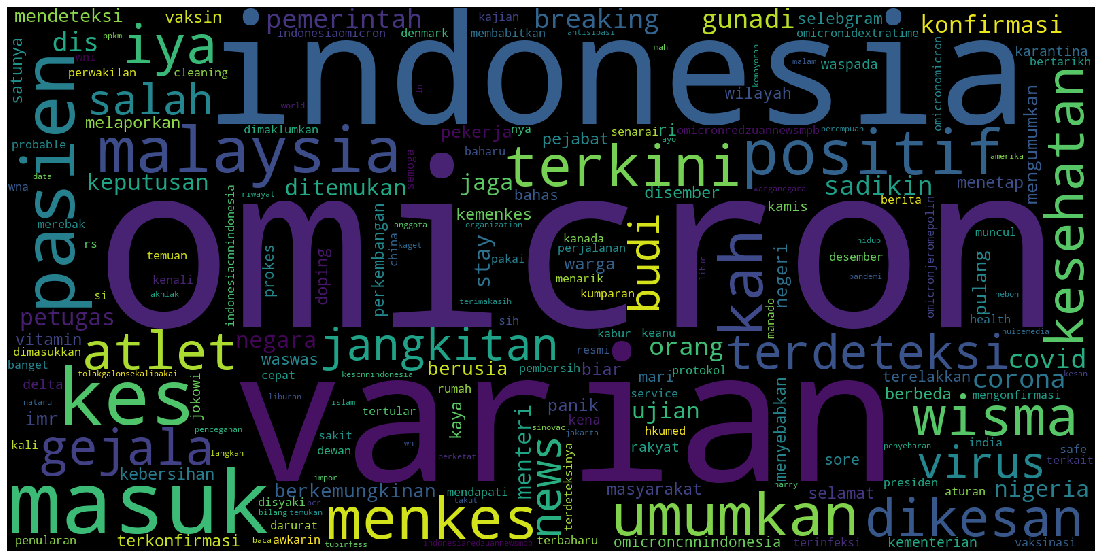

In [ ]:
myimage = calculate_frequencies(cleantweets)
plt.figure( figsize=(20,10) )
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

Omicron sedang banyak dibicarakan di media sosial salah satunya di twitter. Dapat diketahui dari Word Cloud, 2 kata yang paling sering disebut oleh masyarakat berkaitan dengan omicron adalah Indonesia dan varian. Hal ini dikarenakan omicron merupakan varian baru dari Covid-19 yang penyebaran dan gejalanya masih diteliti lebih lanjut terutama di Indonesia yang kemarin baru ditemukan pasien positif varian omicron pertama yang diumumkan oleh Menteri kesehatan. Melalui twitter, masyarakat banyak berbagi dan mencari informasi terkait kesehatan, kasus omicron pertama yang terdeteksi, gejalanya, berita terkini terkait omicron, dsb.

# SENTIMENTAL ANALYSIS

In [ ]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
nltk.download('vader_lexicon')
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in T:
 
 #print(tweet.text)
 tweet_list.append(tweet)
 analysis = TextBlob(tweet)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 if neg > pos:
  negative_list.append(tweet)
  negative += 1
 elif pos > neg:
  positive_list.append(tweet)
  positive += 1
 elif pos == neg:
  neutral_list.append(tweet)
  neutral += 1

def percentage(part,whole):
 return 100 * float(part)/float(whole)
positive = percentage(positive, 20000)
negative = percentage(negative, 20000)
neutral = percentage(neutral, 20000)
polarity = percentage(polarity, 20000)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, ' .1f')

In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  7360
positive number:  2550
negative number:  1748
neutral number:  3062


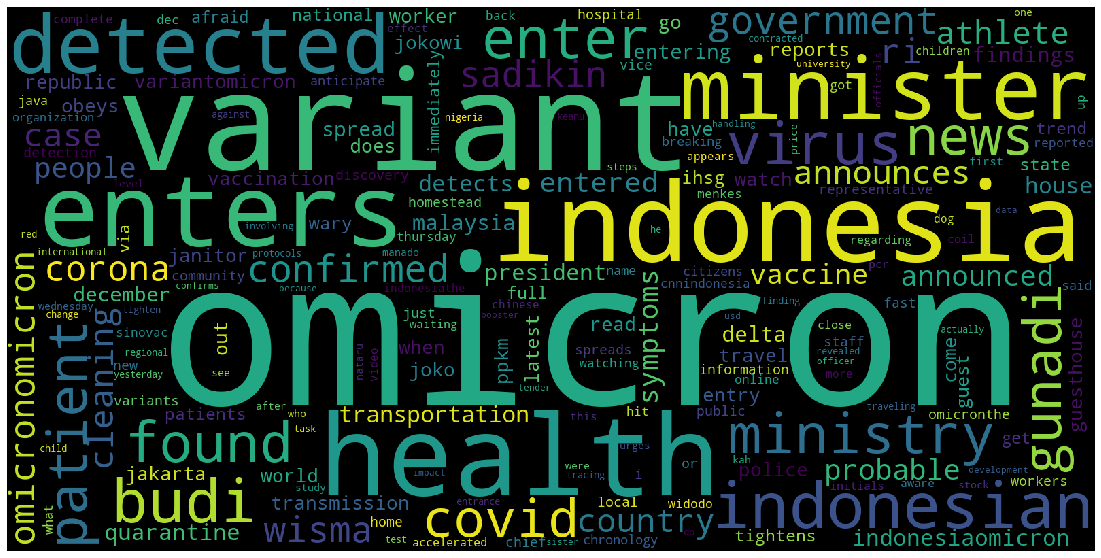

In [ ]:
myimage = calculate_frequencies(neutral_list[0])
plt.figure( figsize=(20,10) )
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

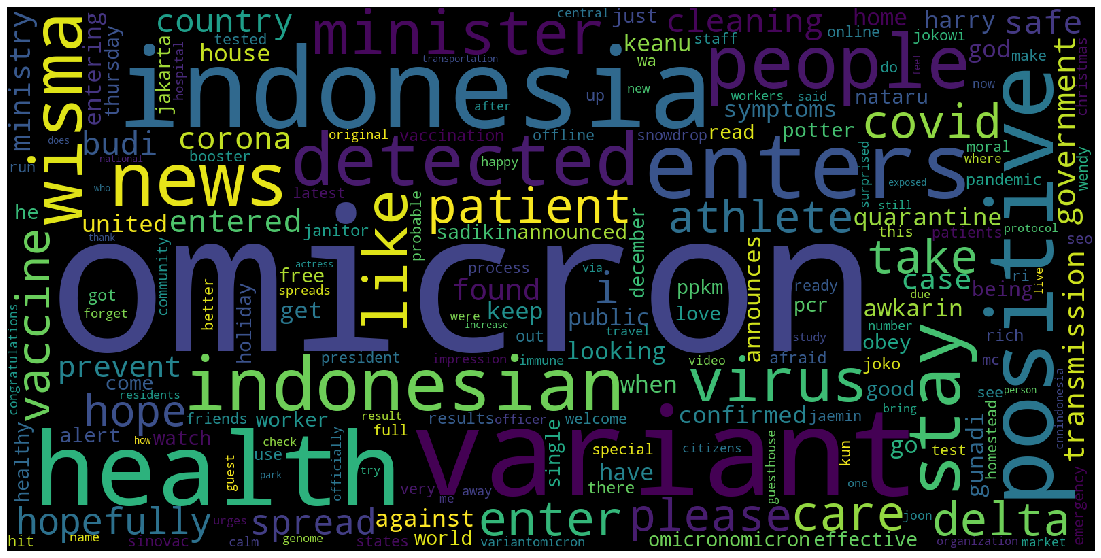

In [ ]:
myimage = calculate_frequencies(positive_list[0])
plt.figure( figsize=(20,10) )
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

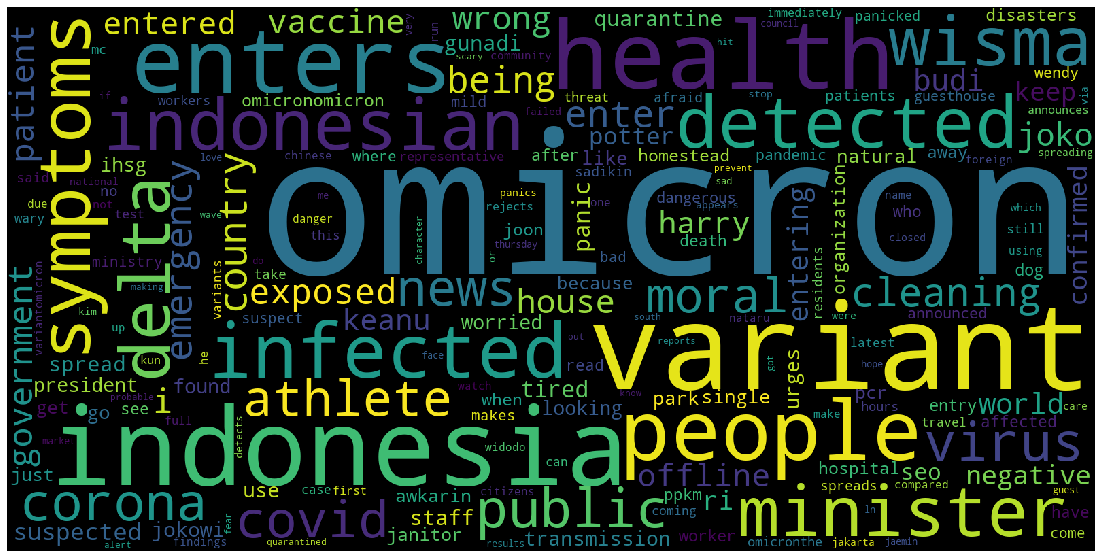

In [ ]:
myimage = calculate_frequencies(negative_list[0])
plt.figure( figsize=(20,10) )
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

Berdasarkan hasil dari proses pengujian yang telah dilakukan terhadap tweets sentiment mengenai omicron dari media sosial twitter diketahui bahwa dari 7360 tweet terdapat 2550 tweet dengan sentimen positif, sedangkan sentimen negatif berjumlah 1748 tweet, dan netral berjumlah 3062. Pada wordcloud sentimen positif, ditemukan kata- kata seperti “kesehatan”, “harapan”, “mencegah”. Hal ini mengindikasikan banyak masyarakat yang lebih memperhatikan kesehatan untuk mencegah penyebaran virus varian baru ini. Pada wordcloud sentimen negatif, ditemukan kata- kata seperti “takut”, “salah”, “berbahaya”, “lelah” dimana mengindikasikan masyarakat merasa takut akan bahaya virus omicron ini. Virus Omicron ini juga berkaitan dengan ihsg, terlihat dari banyaknya mayarakat yg mengunggah postingan mengenai IHSG yang terlihat di wordcloud di atas. 

# CENTRALITY ANALYSIS

Banyak vertex =  14655
Banyak Edges =  0
Banyak vertex =  15564
Banyak Edges =  14908


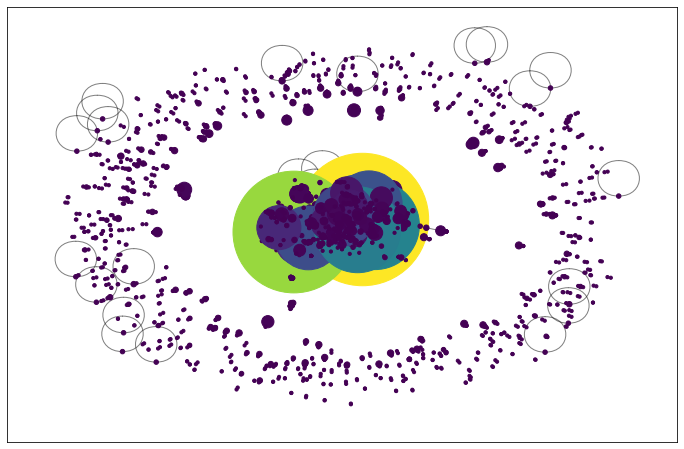

In [ ]:
G = nx.Graph() # Graph Kosong Baru

G.add_nodes_from(users)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)
            
print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())
# Draw the Tweet Graph
plt.subplots(figsize=(12,8))

d = nx.degree(G)
pos = nx.spring_layout(G, seed=seed) # Spring LayOut
D = [d[node]*10 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=D, node_color=D) # Gambar Vertex
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5) # Gambar edges
#nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
plt.show() # Show the graph

##  Degree Centrality

Influencial Users: ['CNNIndonesia', 'redzuanNewsMPB', 'JeromePolin', 'idextratime', 'tubirfess', 'akunyakul', 'JatIkhwan', 'jokowi', 'kumparan', 'mrs']
Influencial Users Scores: [0.11270321 0.09522586 0.0505044  0.04742016 0.02846495 0.02820793
 0.02615177 0.0258305  0.02563773 0.02448114]


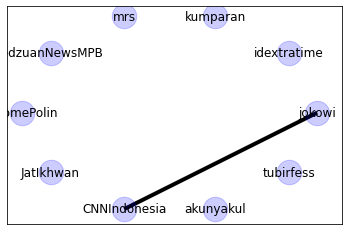

In [ ]:
#mencari user paling penting terkait tweet omicron
degree = tau.Centrality(G, N=10, method='degree', outliers=False, Label = True, layOut='spring')
tau.drawGraph(degree, True, layOut='circular')

## Closeness Centrality

Influencial Users: ['CNNIndonesia', 'ZahraNajwa15', 'akuputraaa', 'jokowi', 'itsmedirgama', 'idextratime', 'JeromePolin', 'deliahyunee', 'kartikaDeee', 'onepunchmas']
Influencial Users Scores: [0.25429259 0.23300555 0.23130981 0.22936911 0.22641997 0.22561634
 0.22521342 0.22330309 0.22311829 0.22236318]


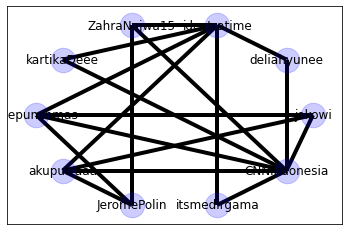

In [ ]:
#mencari user yang tweetnya paling cepat tersebar
close = tau.Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')
tau.drawGraph(close, True, layOut='circular')

## Betweeness Centrality

Influencial Users: ['CNNIndonesia', 'redzuanNewsMPB', 'JeromePolin', 'idextratime', 'jokowi', 'mrs', 'kumparan', 'akunyakul', 'JatIkhwan', 'tubirfess']
Influencial Users Scores: [0.20380131 0.14132531 0.06631203 0.06114776 0.04572759 0.0439924
 0.04108918 0.03490646 0.03437017 0.03030768]


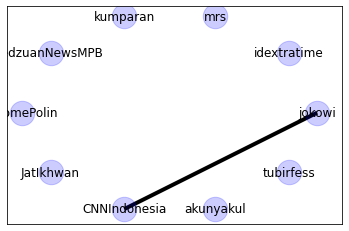

In [ ]:
#mencari user yang paling banyak menjadi jembatan interaksi tweet antara dua user
between = tau.Centrality(G, N=10, method='betweeness', outliers=False, Label = True, layOut='spring')
tau.drawGraph(between, True, layOut='circular')

user- user influential di atas menunjukkan bahwa mereka berperan aktif dalam menyebarluaskan informasi mengenai virus varian baru Omicron di twitter sebagai salah satu sarana media sosial terbesar di Indonesia, sehingga saran dari kelompok kami, user- user tersebut hendaknya membantu masyarakat Indonesia mendapat informasi yang valid mengenai Omicron, bukan menyebarkan kepanikan dan hoax yang pada akhirnya menggiring opini masyarakat tentang virus ini.